In [642]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
#plt.style.use('bmh')

In [643]:
# read all the data
ccba = pd.read_csv('public_train_x_ccba_full_hashed.csv')
cdtx = pd.read_csv('public_train_x_cdtx0001_full_hashed.csv')
custinfo = pd.read_csv('public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('public_train_x_remit1_full_hashed.csv')

#use train answer and public answer
public_x_alert_date = pd.read_csv('public_x_alert_date.csv')
train_x_alert_date = pd.read_csv('train_x_alert_date.csv')
alert_date = pd.concat([public_x_alert_date,train_x_alert_date])
# print(alert_date.shape)

public_y_answer = pd.read_csv('public_answer.csv')
train_y_answer = pd.read_csv('train_y_answer.csv')
y_answer = pd.concat([public_y_answer,train_y_answer])

# sample 0 and 1 to balance
temp = train_y_answer.loc[train_y_answer['sar_flag'] == 0].sample(10000)
temp2 = train_y_answer.loc[train_y_answer['sar_flag'] == 1]

train_y_answer2 = pd.concat([temp,temp2])
print(train_y_answer2.shape)


(10234, 2)


In [ ]:
from imblearn.over_sampling import SMOTE

In [644]:
df = pd.merge(train_x_alert_date,train_y_answer2)
# df2 = pd.read_csv('預測的案件名單及提交檔案範例.csv').drop('probability',axis=1)
# df = pd.merge(df,df2,on='alert_key')
print(df.head(),'\n',df.shape)

   alert_key  date  sar_flag
0     171189     0         0
1     171202     0         0
2     171737     0         0
3     171142     0         0
4     171207     0         0 
 (10234, 3)


## check every csv 

In [645]:
def check_csv(df):
    print(df.head(),'\n',df.shape)
    print(df.isnull().sum())

check_csv(ccba)

                                             cust_id  lupay  byymm     cycam  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0      0  152628.0   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     30  152628.0   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     61  152628.0   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     91  152628.0   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0    122  152628.0   

   usgam  clamt  csamt  inamt  cucsm  cucah  
0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0   
 (59075, 10)
cust_id    0
lupay      0
byymm      0
cycam      0
usgam      0
clamt      0
csamt      0
inamt      0
cucsm      0
cucah      0
dtype: int64


In [646]:
temp = ccba.drop(['usgam','clamt','csamt','cucah'],axis=1)
ccba = temp
check_csv(ccba)

                                             cust_id  lupay  byymm     cycam  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0      0  152628.0   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     30  152628.0   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     61  152628.0   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     91  152628.0   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0    122  152628.0   

   inamt  cucsm  
0    0.0    0.0  
1    0.0    0.0  
2    0.0    0.0  
3    0.0    0.0  
4    0.0    0.0   
 (59075, 6)
cust_id    0
lupay      0
byymm      0
cycam      0
inamt      0
cucsm      0
dtype: int64


In [647]:
check_csv(cdtx)

                                             cust_id  date  country  cur_type  \
0  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...     1      130        47   
1  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    10      130        47   
2  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    10      130        47   
3  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    13      130        47   
4  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    15      130        47   

      amt  
0  2312.0  
1   808.0  
2  7099.0  
3   306.0  
4   255.0   
 (1043014, 5)
cust_id     0
date        0
country     0
cur_type    0
amt         0
dtype: int64


In [648]:

temp = cdtx.drop(['country','cur_type'],axis=1).groupby(['cust_id','date'],as_index=False)['amt'].sum()
# temp = cdtx.groupby(['cust_id','date','country','cur_type'],as_index=False).sum()

cdtx = temp
print(cdtx)

                                                  cust_id  date      amt
0       0015cc01f553512007705edf855baa16f1b57a16fb107e...    21  13428.0
1       0015cc01f553512007705edf855baa16f1b57a16fb107e...    52    202.0
2       0015cc01f553512007705edf855baa16f1b57a16fb107e...    56   3624.0
3       0015cc01f553512007705edf855baa16f1b57a16fb107e...    59    175.0
4       0015cc01f553512007705edf855baa16f1b57a16fb107e...    62    128.0
...                                                   ...   ...      ...
414463  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   359    229.0
414464  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   360   1112.0
414465  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   361     59.0
414466  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   364    156.0
414467  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   377    486.0

[414468 rows x 3 columns]


In [649]:
check_csv(custinfo)

   alert_key                                            cust_id  risk_rank  \
0     352249  82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...          1   
1     352253  b212d14cb35676926682b2cf849e295d948888f556c07e...          1   
2     352254  e5b0002791c7852644a2730abeaa893cdf14a072ef7812...          1   
3     352280  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...          3   
4     352282  0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...          1   

   occupation_code  total_asset  AGE  
0             19.0    1465816.0    7  
1              2.0      98177.0    2  
2             19.0    2052922.0    7  
3             15.0     201906.0    5  
4             12.0       7450.0    5   
 (25751, 6)
alert_key            0
cust_id              0
risk_rank            0
occupation_code    116
total_asset          0
AGE                  0
dtype: int64


In [650]:
check_csv(dp)

                                             cust_id debit_credit  tx_date  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       36   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       42   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       39   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       49   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       70   

   tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  fiscTxId  \
0       18        2   68265.0         1.0               16       NaN   
1       17        2  932058.0         1.0               16       NaN   
2       18        2    6089.0         1.0               16       NaN   
3       15        2  776715.0         1.0               16       NaN   
4       19        2   61630.0         1.0               16       NaN   

   txbranch  cross_bank  ATM  
0       NaN           0    0  
1       NaN           0    0  
2    

In [651]:
# too many Nan in 'fiscTxId' and 'txbranch' so we drop them
temp = dp.drop(['tx_time','exchg_rate','fiscTxId','txbranch'],axis=1)

# then we drop columns
# 當天交易總額
temp.groupby(['cust_id','tx_date'])['tx_amt'].sum()
dp = temp
check_csv(dp)

                                             cust_id debit_credit  tx_date  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       36   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       42   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       39   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       49   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       70   

   tx_type    tx_amt  info_asset_code  cross_bank  ATM  
0        2   68265.0               16           0    0  
1        2  932058.0               16           0    0  
2        2    6089.0               16           0    0  
3        2  776715.0               16           0    0  
4        2   61630.0               16           0    0   
 (1969818, 8)
cust_id                0
debit_credit           0
tx_date                0
tx_type                0
tx_amt             22015
info_asset_code        0
cross_bank             0

In [652]:
check_csv(remit)

                                             cust_id  trans_date  trans_no  \
0  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         148         0   
1  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         165         0   
2  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         231         0   
3  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         291         0   
4  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         389         0   

   trade_amount_usd  
0          100528.0  
1          100528.0  
2           89479.0  
3          100528.0  
4           30158.0   
 (17167, 4)
cust_id             0
trans_date          0
trans_no            0
trade_amount_usd    0
dtype: int64


In [653]:
# temp = remit.drop(['trans_no'],axis=1)
temp = remit
#交易總額
temp = temp.groupby(['cust_id','trans_date'],as_index=False)['trade_amount_usd'].sum()
remit = temp
check_csv(remit)

                                             cust_id  trans_date  \
0  002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de805...         153   
1  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         223   
2  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         312   
3  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         328   
4  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         356   

   trade_amount_usd  
0          343647.0  
1            6071.0  
2           60024.0  
3          531413.0  
4            2109.0   
 (15413, 3)
cust_id             0
trans_date          0
trade_amount_usd    0
dtype: int64


## Merge csv

In [654]:
# merge custinfo to get alert_key with custid and get more information
df = pd.merge(df,custinfo,on='alert_key')
print(df.head(),'\n',df.shape)
print(df.isnull().sum())

   alert_key  date  sar_flag  \
0     171189     0         0   
1     171202     0         0   
2     171737     0         0   
3     171142     0         0   
4     171207     0         0   

                                             cust_id  risk_rank  \
0  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
1  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3   
2  a0861608615a9365d90f4ba0a813c0ea0471987f925c8b...          3   
3  a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...          3   
4  43ca84051796dcbb9ad40a9660df4bd757b1d382352bc0...          1   

   occupation_code  total_asset  AGE  
0             17.0     375576.0    4  
1             12.0    2717416.0    2  
2             14.0    1014759.0    4  
3             12.0     241719.0    3  
4             19.0     358135.0    3   
 (10234, 8)
alert_key           0
date                0
sar_flag            0
cust_id             0
risk_rank           0
occupation_code    52
total_asset         0
AGE

In [655]:
# merge ccba on cust_id and date
temp = pd.merge(df,ccba.rename(columns={'byymm':'date'}),on=['cust_id','date'],how='left')
print(temp.head(),'\n',temp.shape)
print(temp.isnull().sum())
df = temp

   alert_key  date  sar_flag  \
0     171189     0         0   
1     171202     0         0   
2     171737     0         0   
3     171142     0         0   
4     171207     0         0   

                                             cust_id  risk_rank  \
0  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
1  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3   
2  a0861608615a9365d90f4ba0a813c0ea0471987f925c8b...          3   
3  a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...          3   
4  43ca84051796dcbb9ad40a9660df4bd757b1d382352bc0...          1   

   occupation_code  total_asset  AGE    lupay     cycam    inamt     cucsm  
0             17.0     375576.0    4  85428.0  301224.0      0.0  151434.0  
1             12.0    2717416.0    2      NaN       NaN      NaN       NaN  
2             14.0    1014759.0    4      NaN       NaN      NaN       NaN  
3             12.0     241719.0    3  12565.0  150744.0  12477.0   12477.0  
4             19.0 

In [656]:
# merge cdtx on cust_id and date
temp = pd.merge(df,cdtx,on=['cust_id','date'],how='left')
print(temp.head(),'\n',temp.shape)
print(temp.isnull().sum())
df = temp

   alert_key  date  sar_flag  \
0     171189     0         0   
1     171202     0         0   
2     171737     0         0   
3     171142     0         0   
4     171207     0         0   

                                             cust_id  risk_rank  \
0  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
1  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3   
2  a0861608615a9365d90f4ba0a813c0ea0471987f925c8b...          3   
3  a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...          3   
4  43ca84051796dcbb9ad40a9660df4bd757b1d382352bc0...          1   

   occupation_code  total_asset  AGE    lupay     cycam    inamt     cucsm  \
0             17.0     375576.0    4  85428.0  301224.0      0.0  151434.0   
1             12.0    2717416.0    2      NaN       NaN      NaN       NaN   
2             14.0    1014759.0    4      NaN       NaN      NaN       NaN   
3             12.0     241719.0    3  12565.0  150744.0  12477.0   12477.0   
4             

In [657]:
# merge dp on cust_id and date
temp = pd.merge(df,dp.rename(columns={'tx_date':'date'}),on=['cust_id','date'],how='left')
#turn 'debit_credit' into dummy variables
temp = pd.get_dummies(temp, columns=['debit_credit'])
print(temp.head(),'\n',temp.shape)
print(temp.isnull().sum())
df = temp

   alert_key  date  sar_flag  \
0     171189     0         0   
1     171189     0         0   
2     171189     0         0   
3     171202     0         0   
4     171202     0         0   

                                             cust_id  risk_rank  \
0  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
1  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
2  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
3  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3   
4  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3   

   occupation_code  total_asset  AGE    lupay     cycam  inamt     cucsm  \
0             17.0     375576.0    4  85428.0  301224.0    0.0  151434.0   
1             17.0     375576.0    4  85428.0  301224.0    0.0  151434.0   
2             17.0     375576.0    4  85428.0  301224.0    0.0  151434.0   
3             12.0    2717416.0    2      NaN       NaN    NaN       NaN   
4             12.0    27

In [658]:
# merge remit on cust_id and date
temp = pd.merge(df,remit.rename(columns={'trans_date':'date'}),on=['cust_id','date'],how='left')
print(temp.head(),'\n',temp.shape)
print(temp.isnull().sum())
df = temp

   alert_key  date  sar_flag  \
0     171189     0         0   
1     171189     0         0   
2     171189     0         0   
3     171202     0         0   
4     171202     0         0   

                                             cust_id  risk_rank  \
0  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
1  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
2  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
3  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3   
4  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3   

   occupation_code  total_asset  AGE    lupay     cycam  ...     cucsm    amt  \
0             17.0     375576.0    4  85428.0  301224.0  ...  151434.0  673.0   
1             17.0     375576.0    4  85428.0  301224.0  ...  151434.0  673.0   
2             17.0     375576.0    4  85428.0  301224.0  ...  151434.0  673.0   
3             12.0    2717416.0    2      NaN       NaN  ...       NaN    NaN   

In [659]:
# fill all Nan
df.fillna(0,inplace=True)
print(df.head(),'\n',df.shape)
print(df.isnull().sum())

   alert_key  date  sar_flag  \
0     171189     0         0   
1     171189     0         0   
2     171189     0         0   
3     171202     0         0   
4     171202     0         0   

                                             cust_id  risk_rank  \
0  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
1  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
2  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1   
3  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3   
4  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3   

   occupation_code  total_asset  AGE    lupay     cycam  ...     cucsm    amt  \
0             17.0     375576.0    4  85428.0  301224.0  ...  151434.0  673.0   
1             17.0     375576.0    4  85428.0  301224.0  ...  151434.0  673.0   
2             17.0     375576.0    4  85428.0  301224.0  ...  151434.0  673.0   
3             12.0    2717416.0    2      0.0       0.0  ...       0.0    0.0   

## 檢查是否保留住所有alert_key

In [660]:
print("shape of 'df.groupby('alert_key').first()':",df.groupby('alert_key').first().shape)

shape of 'df.groupby('alert_key').first()': (10234, 20)


In [661]:
# drop 'cust_id' and 'alert_key'
X_ak = df['alert_key']
df.drop(['cust_id','alert_key'],axis=1,inplace=True)

In [662]:
from imblearn.over_sampling import SMOTE
# train test split
X = df.drop(['sar_flag'], axis=1)
Y = df['sar_flag']

from sklearn import preprocessing
#Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
X=minmax_scale.fit_transform(X)

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.05, random_state=42)

# X_train,Y_train = SMOTE(random_state=42).fit_resample(X_train,Y_train)

## Print Correlation Matrix

<AxesSubplot: title={'center': 'Correlation Matrix'}>

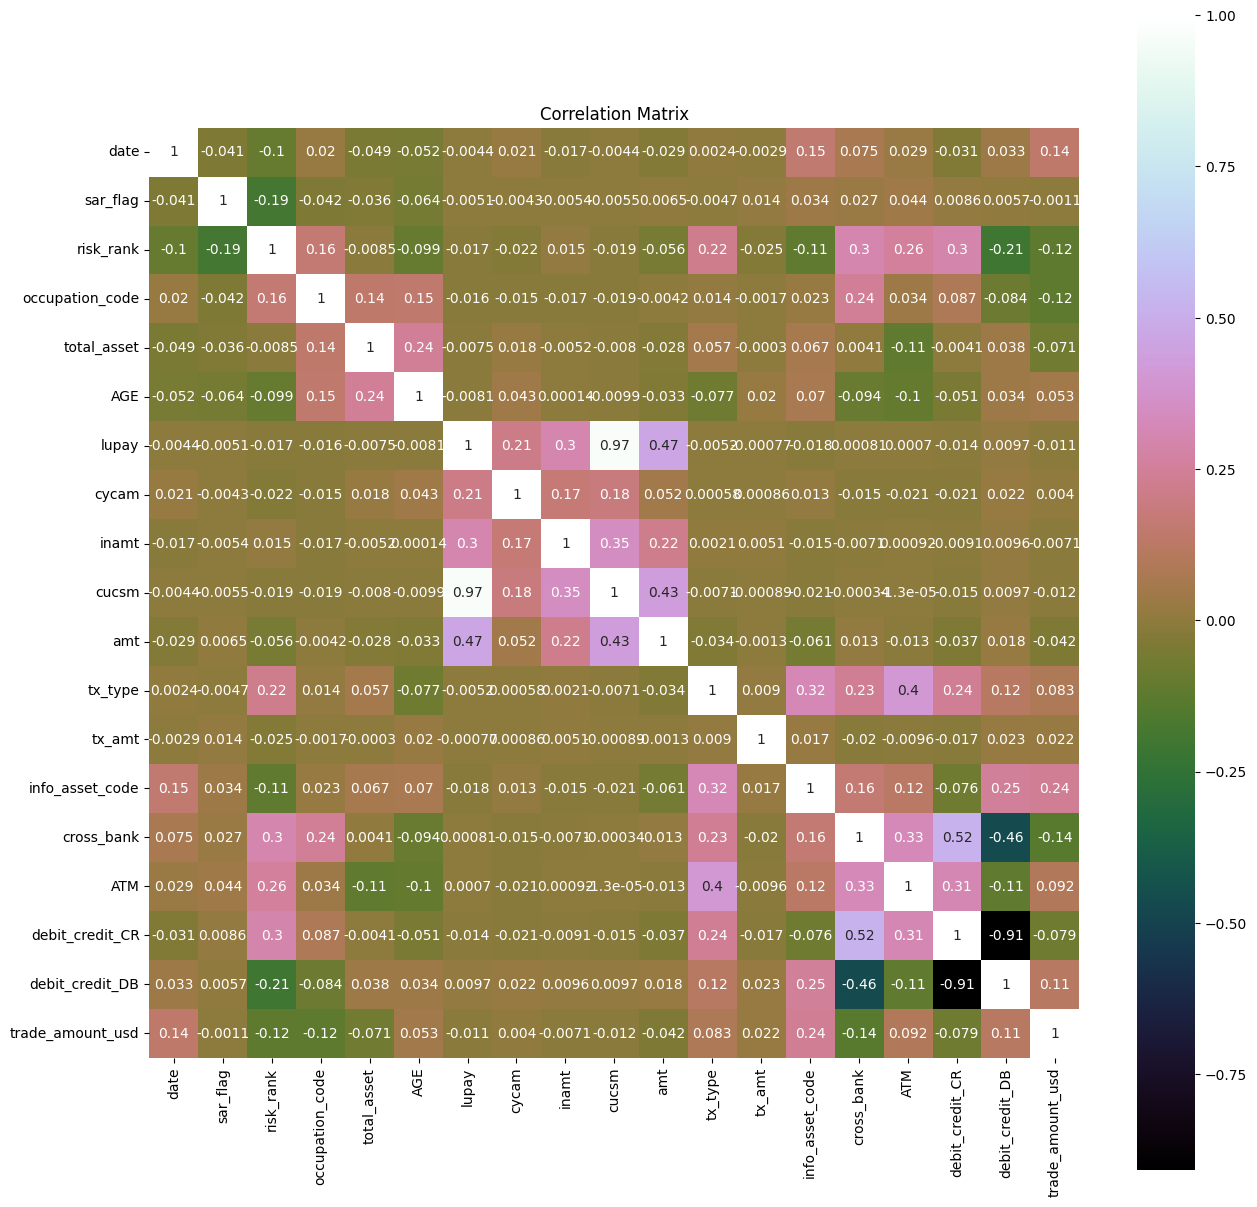

In [663]:
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [664]:
from sklearn import ensemble, metrics
from numpy import random
import joblib
import os

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

input_dim = X_train.shape[1]
batch_size = int(X_train.shape[0] / 200)
epochs = 100
train = 1
load = 1
weight_path = 'third_try_weights_best.hdf5'

model = Sequential()
model.add(Dense(input_dim=input_dim,units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

if load == 1:
    model.load_weights(weight_path)

if train == 1:
    # checkpoint
    checkpoint = ModelCheckpoint(weight_path, monitor='loss', verbose=1, save_best_only=True,mode='min')
    callbacks_list = [checkpoint]
    #Train model
    model.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_split=0,callbacks=callbacks_list)
else:
    model.load_weights(weight_path)

Epoch 1/100
179/201 [=========================>....] - ETA: 0s - loss: 0.0582 - accuracy: 0.9781
Epoch 1: loss improved from inf to 0.05774, saving model to third_try_weights_best.hdf5
201/201 [==============================] - 0s 917us/step - loss: 0.0577 - accuracy: 0.9783
Epoch 2/100
185/201 [==========================>...] - ETA: 0s - loss: 0.0557 - accuracy: 0.9794
Epoch 2: loss improved from 0.05774 to 0.05582, saving model to third_try_weights_best.hdf5
201/201 [==============================] - 0s 883us/step - loss: 0.0558 - accuracy: 0.9793
Epoch 3/100
185/201 [==========================>...] - ETA: 0s - loss: 0.0559 - accuracy: 0.9793
Epoch 3: loss improved from 0.05582 to 0.05580, saving model to third_try_weights_best.hdf5
201/201 [==============================] - 0s 923us/step - loss: 0.0558 - accuracy: 0.9794
Epoch 4/100
187/201 [==========================>...] - ETA: 0s - loss: 0.0555 - accuracy: 0.9793
Epoch 4: loss improved from 0.05580 to 0.05548, saving model to thi

In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression().fit(X_train,Y_train)

In [665]:
model.load_weights(weight_path)

In [666]:
def print_acc(expected,predicted):
    print(metrics.classification_report(expected,predicted))
    print(metrics.confusion_matrix(expected, predicted))
    accuracy = accuracy_score(expected, predicted)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    # print("Average = macro")
    print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
    print('recall:',metrics.recall_score(expected, predicted,average='macro'))
    print('F1-score:',metrics.f1_score(expected, predicted,average='macro'))


predicted = model.predict(X_valid).round()
print_acc(Y_valid,predicted)

121/121 [==============================] - 0s 837us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3716
           1       0.77      0.65      0.70       130

    accuracy                           0.98      3846
   macro avg       0.88      0.82      0.85      3846
weighted avg       0.98      0.98      0.98      3846

[[3691   25]
 [  46   84]]
Accuracy: 98.15%
precision: 0.8791664313964251
recall: 0.8197130909994204
F1-score: 0.8467012525354145


### 提交符合範例的csv檔案

In [667]:
df2 = pd.read_csv('預測的案件名單及提交檔案範例.csv').drop('probability',axis=1)

df2 = pd.merge(df2,alert_date,on='alert_key',how='left')

print(df2.head(),'\n',df2.shape)
print(df2.isnull().sum())

# merge custinfo to get alert_key with custid and get more information
df2 = pd.merge(df2,custinfo,on='alert_key',how='left')
print(df2.head(),'\n',df2.shape)
print(df2.isnull().sum())

   alert_key   date
0     357307  370.0
1     376329    NaN
2     373644    NaN
3     357668  370.0
4     354443  372.0 
 (3850, 2)
alert_key       0
date         2005
dtype: int64
   alert_key   date                                            cust_id  \
0     357307  370.0  1d69b4daf9c5c8b8d68b1776193b6e80bf2e84c999d038...   
1     376329    NaN                                                NaN   
2     373644    NaN                                                NaN   
3     357668  370.0  8b51184740375f7ccdd68484aeeaca44c5892818eda908...   
4     354443  372.0  c6def618ad861703c025be4f41bdf7569310228ae93aef...   

   risk_rank  occupation_code  total_asset  AGE  
0        1.0              4.0    2588452.0  3.0  
1        NaN              NaN          NaN  NaN  
2        NaN              NaN          NaN  NaN  
3        1.0             19.0    1964540.0  5.0  
4        1.0              2.0     444392.0  3.0   
 (3850, 7)
alert_key             0
date               2005
cust_id       

In [668]:
# merge ccba on cust_id and date
temp = pd.merge(df2,ccba.rename(columns={'byymm':'date'}),on=['cust_id','date'],how='left')
print(temp.head(),'\n',temp.shape)
print(temp.isnull().sum())
df2 = temp

   alert_key   date                                            cust_id  \
0     357307  370.0  1d69b4daf9c5c8b8d68b1776193b6e80bf2e84c999d038...   
1     376329    NaN                                                NaN   
2     373644    NaN                                                NaN   
3     357668  370.0  8b51184740375f7ccdd68484aeeaca44c5892818eda908...   
4     354443  372.0  c6def618ad861703c025be4f41bdf7569310228ae93aef...   

   risk_rank  occupation_code  total_asset  AGE  lupay  cycam  inamt  cucsm  
0        1.0              4.0    2588452.0  3.0    NaN    NaN    NaN    NaN  
1        NaN              NaN          NaN  NaN    NaN    NaN    NaN    NaN  
2        NaN              NaN          NaN  NaN    NaN    NaN    NaN    NaN  
3        1.0             19.0    1964540.0  5.0    NaN    NaN    NaN    NaN  
4        1.0              2.0     444392.0  3.0    NaN    NaN    NaN    NaN   
 (3850, 11)
alert_key             0
date               2005
cust_id            2005
ri

In [669]:
# merge cdtx on cust_id and date
df2 = pd.merge(df2,cdtx,on=['cust_id','date'],how='left')
print(df2.head(),'\n',df2.shape)
print(df2.isnull().sum())

   alert_key   date                                            cust_id  \
0     357307  370.0  1d69b4daf9c5c8b8d68b1776193b6e80bf2e84c999d038...   
1     376329    NaN                                                NaN   
2     373644    NaN                                                NaN   
3     357668  370.0  8b51184740375f7ccdd68484aeeaca44c5892818eda908...   
4     354443  372.0  c6def618ad861703c025be4f41bdf7569310228ae93aef...   

   risk_rank  occupation_code  total_asset  AGE  lupay  cycam  inamt  cucsm  \
0        1.0              4.0    2588452.0  3.0    NaN    NaN    NaN    NaN   
1        NaN              NaN          NaN  NaN    NaN    NaN    NaN    NaN   
2        NaN              NaN          NaN  NaN    NaN    NaN    NaN    NaN   
3        1.0             19.0    1964540.0  5.0    NaN    NaN    NaN    NaN   
4        1.0              2.0     444392.0  3.0    NaN    NaN    NaN    NaN   

    amt  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4  10.0   
 (3850, 12)
alert_k

In [670]:
# merge dp on cust_id and date
temp = pd.merge(df2,dp.rename(columns={'tx_date':'date'}),on=['cust_id','date'],how='left')
#turn 'debit_credit' into dummy variables
temp = pd.get_dummies(temp, columns=['debit_credit'])
print(temp.head(),'\n',temp.shape)
print(temp.isnull().sum())
df2 = temp


   alert_key   date                                            cust_id  \
0     357307  370.0  1d69b4daf9c5c8b8d68b1776193b6e80bf2e84c999d038...   
1     376329    NaN                                                NaN   
2     373644    NaN                                                NaN   
3     357668  370.0  8b51184740375f7ccdd68484aeeaca44c5892818eda908...   
4     357668  370.0  8b51184740375f7ccdd68484aeeaca44c5892818eda908...   

   risk_rank  occupation_code  total_asset  AGE  lupay  cycam  inamt  cucsm  \
0        1.0              4.0    2588452.0  3.0    NaN    NaN    NaN    NaN   
1        NaN              NaN          NaN  NaN    NaN    NaN    NaN    NaN   
2        NaN              NaN          NaN  NaN    NaN    NaN    NaN    NaN   
3        1.0             19.0    1964540.0  5.0    NaN    NaN    NaN    NaN   
4        1.0             19.0    1964540.0  5.0    NaN    NaN    NaN    NaN   

   amt  tx_type  tx_amt  info_asset_code  cross_bank  ATM  debit_credit_CR  \
0 

In [671]:
# merge remit on cust_id and date
df2 = pd.merge(df2,remit.rename(columns={'trans_date':'date'}),on=['cust_id','date'],how='left')
print(df2.head(),'\n',df2.shape)
print(df2.isnull().sum())

   alert_key   date                                            cust_id  \
0     357307  370.0  1d69b4daf9c5c8b8d68b1776193b6e80bf2e84c999d038...   
1     376329    NaN                                                NaN   
2     373644    NaN                                                NaN   
3     357668  370.0  8b51184740375f7ccdd68484aeeaca44c5892818eda908...   
4     357668  370.0  8b51184740375f7ccdd68484aeeaca44c5892818eda908...   

   risk_rank  occupation_code  total_asset  AGE  lupay  cycam  inamt  cucsm  \
0        1.0              4.0    2588452.0  3.0    NaN    NaN    NaN    NaN   
1        NaN              NaN          NaN  NaN    NaN    NaN    NaN    NaN   
2        NaN              NaN          NaN  NaN    NaN    NaN    NaN    NaN   
3        1.0             19.0    1964540.0  5.0    NaN    NaN    NaN    NaN   
4        1.0             19.0    1964540.0  5.0    NaN    NaN    NaN    NaN   

   amt  tx_type  tx_amt  info_asset_code  cross_bank  ATM  debit_credit_CR  \
0 

In [672]:
# fill all Nan
df2.fillna(0,inplace=True)
print(df2.head(),'\n',df2.shape)
print(df2.isnull().sum())

# save alert key
df2_ak = df2['alert_key']

   alert_key   date                                            cust_id  \
0     357307  370.0  1d69b4daf9c5c8b8d68b1776193b6e80bf2e84c999d038...   
1     376329    0.0                                                  0   
2     373644    0.0                                                  0   
3     357668  370.0  8b51184740375f7ccdd68484aeeaca44c5892818eda908...   
4     357668  370.0  8b51184740375f7ccdd68484aeeaca44c5892818eda908...   

   risk_rank  occupation_code  total_asset  AGE  lupay  cycam  inamt  cucsm  \
0        1.0              4.0    2588452.0  3.0    0.0    0.0    0.0    0.0   
1        0.0              0.0          0.0  0.0    0.0    0.0    0.0    0.0   
2        0.0              0.0          0.0  0.0    0.0    0.0    0.0    0.0   
3        1.0             19.0    1964540.0  5.0    0.0    0.0    0.0    0.0   
4        1.0             19.0    1964540.0  5.0    0.0    0.0    0.0    0.0   

   amt  tx_type  tx_amt  info_asset_code  cross_bank  ATM  debit_credit_CR  \
0 

## 檢查是否保留所有alert_key

In [ ]:
print("shape of 'df2.groupby('alert_key').first()':",df2.groupby('alert_key').first().shape)

In [673]:
# drop 'cust_id' and 'alert_key'
df2.drop(['cust_id','alert_key'],axis=1,inplace=True)

#Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
df2=minmax_scale.fit_transform(df2)

In [674]:
ans_y = model.predict(df2).flatten()

df3 = pd.DataFrame({
    "probability":ans_y
})
print(ans_y.shape)

final = pd.concat([df2_ak,df3],axis=1)
print(final.shape)

final = final.groupby('alert_key',as_index=False).max()
print(final.shape)

# 機率由大到小
final.sort_values(inplace=True,by=['probability'],ascending=False)
print(final)

final.to_csv('submission_third_try.csv', index=False)

500/500 [==============================] - 0s 474us/step
(15975,)
(15975, 2)
(3850, 2)
      alert_key  probability
462      355761     0.999135
215      354246     0.929990
1310     361145     0.608380
1058     359536     0.550481
807      357870     0.521367
...         ...          ...
32       352493     0.000000
26       352476     0.000000
18       352332     0.000000
78       352886     0.000000
746      357478     0.000000

[3850 rows x 2 columns]


In [ ]:
# df4 = pd.read_csv('預測的案件名單及提交檔案範例.csv').drop('probability',axis=1)
# print(df4)

In [ ]:
# temp = pd.merge(df4,final,on='alert_key',how='left').fillna(0)
# # 機率由大到小
# temp.sort_values(inplace=True,by=['probability'],ascending=False)
# temp.to_csv('submission_third_try.csv', index=False)
# print(temp)